In [1]:
import pickle
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import roc_curve

c:\Users\Priya\Downloads\Udemy\venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
exp_path = Path("../output/30_episodes/")

In [4]:
train_eers = {}
test_eers = {}

train_fars = {}
test_fars = {}

train_frrs = {}
test_frrs = {}

train_accuracies = {}
test_accuracies = {}

train_fprs = {}
train_tprs = {}

test_fprs = {}
test_tprs = {}

eer_per_iterations = {}

for f in exp_path.iterdir():
    if f.is_dir():
        # Obtain metrics
        user_id = f.name

        train_metrics_path = Path(f / f"train_metrics.pickle")
        test_metrics_path = Path(f / f"test_metrics.pickle")

        train_metrics = None
        with open(train_metrics_path, "rb") as f:
            train_metrics = pickle.load(f)
        
        test_metrics = None
        with open(test_metrics_path, "rb") as f:
            test_metrics = pickle.load(f)
        
        # DO HERE
        train_eers[user_id] = train_metrics["best_metrics"]["eer"]
        test_eers[user_id] = test_metrics["best_metrics"]["eer"]

        train_fars[user_id] = train_metrics["best_metrics"]["far"]
        test_fars[user_id] = test_metrics["best_metrics"]["far"]
        
        train_frrs[user_id] = train_metrics["best_metrics"]["frr"]
        test_frrs[user_id] = test_metrics["best_metrics"]["frr"]
        
        train_accuracies[user_id] = train_metrics["best_metrics"]["accuracy"]
        test_accuracies[user_id] = test_metrics["best_metrics"]["accuracy"]

        # Per user FPR TPR
        fpr, tpr, _ = roc_curve(train_metrics["best_metrics"]["y_true"], train_metrics["best_metrics"]["y_pred"], pos_label=1)
        train_fprs[user_id] = fpr
        train_tprs[user_id] = tpr

        fpr, tpr, _ = roc_curve(test_metrics["best_metrics"]["y_true"], test_metrics["best_metrics"]["y_pred"], pos_label=1)
        test_fprs[user_id] = fpr
        test_tprs[user_id] = tpr

        # EER per iteration
        eer_per_iterations[user_id] = train_metrics["eer_per_iteration"]

In [12]:
# Average EER, FAR, FRR, Accuracy
average_train_eer = np.mean(list(train_eers.values()))
average_test_eer = np.mean(list(test_eers.values()))

average_train_far = np.mean(list(train_fars.values()))
average_test_far = np.mean(list(test_fars.values()))

average_train_frr = np.mean(list(train_frrs.values()))
average_test_frr = np.mean(list(test_frrs.values()))

average_train_accuracy = np.mean(list(train_accuracies.values()))
average_test_accuracy = np.mean(list(test_accuracies.values()))

print(f"Average train EER: {average_train_eer:.4f}")
print(f"Average test EER: {average_test_eer:.4f}")

print(f"Average train FAR: {average_train_far:.4f}")
print(f"Average test FAR: {average_test_far:.4f}")

print(f"Average train FRR: {average_train_frr:.4f}")
print(f"Average test FRR: {average_test_frr:.4f}")

print(f"Average train Accuracy: {average_train_accuracy:.4f}")
print(f"Average test Accuracy: {average_test_accuracy:.4f}")

Average train EER: 0.0049
Average test EER: 0.3078
Average train FAR: 0.0041
Average test FAR: 0.5936
Average train FRR: 0.0643
Average test FRR: 0.1097
Average train Accuracy: 0.9665
Average test Accuracy: 0.6594


In [13]:
def plot_eer_per_iteration(user_ids):
    fig = plt.figure(figsize=(10,6), facecolor="white")
    for user_id in user_ids:
        fig.gca().plot(eer_per_iterations[user_id], label=user_id)
    
    fig.gca().set_title("EER vs iterations")
    fig.gca().set_xlabel("Iteration number")
    fig.gca().set_ylabel("EER")
    fig.gca().legend()
    fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

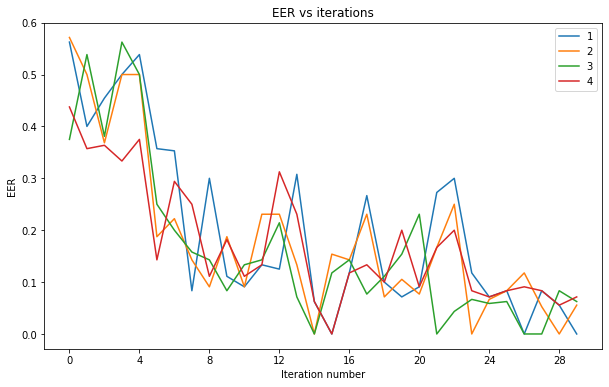

In [14]:
plot_eer_per_iteration(["1","2","3","4"]) #for train

In [9]:
def plot_roc_curve(user_ids, mode="train"):
    fig = plt.figure(figsize=(10,6), facecolor="white")
    for user_id in user_ids:
        if mode=="train":
            fig.gca().plot(train_fprs[user_id], train_tprs[user_id], label=user_id)
        else:
            fig.gca().plot(test_fprs[user_id], test_tprs[user_id], label=user_id)
    
    fig.gca().set_title("ROC Curve")
    fig.gca().set_xlabel("FPR")
    fig.gca().set_ylabel("TPR")
    fig.gca().legend()
    plt.show()

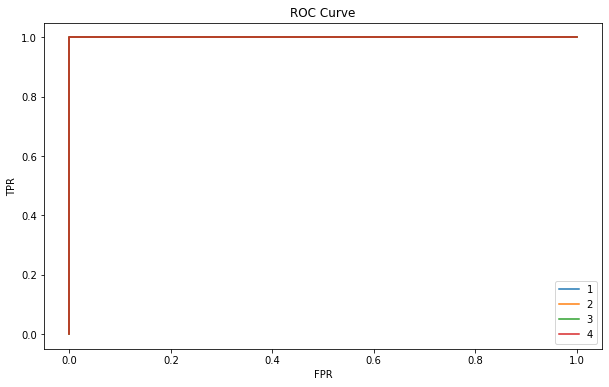

In [15]:
plot_roc_curve(["1","2","3","4"], mode="train")

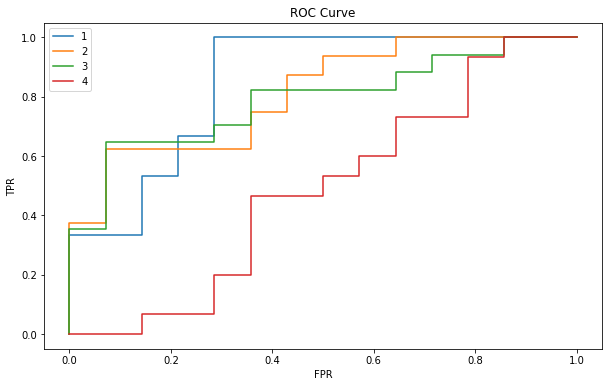

In [16]:
plot_roc_curve(["1","2","3","4"], mode="test")